<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r8-i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-1-r8.csv?token=AKVFSOCOQGT3T2W6ORFAWJC63I4NU')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-11-r8.csv?token=AKVFSOC4TLQUBVRJBWFEK6C63I4LO')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-4-m-1-r8.csv?token=AKVFSOFT3BAQQMFZPFR7IIC63I4LS')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-4-m-11-r8.csv?token=AKVFSOC2JZDWG47MYOKTHGS63I4LW')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-6-m-1-r8.csv?token=AKVFSOGCH23WISV5QW52APC63I4L2')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-6-m-11-r8.csv?token=AKVFSOCZVGOUFEGCDXKDU7K63I4L4')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-9-m-1-r8.csv?token=AKVFSOGIQ4YHMCKCVAL6IFC63I4MA')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-9-m-11-r8.csv?token=AKVFSOEXLROJ2EVIHOJXDT263I4MC')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-normal-n-0-15-r8.csv?token=AKVFSOAHUEWQYSGZO3H3HJK63I4MI')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-normal-n-0-4-r8.csv?token=AKVFSOBZ4GCGJORVDBTT4QS63I4MU')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-normal-n-0-6-r8.csv?token=AKVFSOGSEHNO4YS4IFPNTPK63I4M2')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-normal-n-0-9-r8.csv?token=AKVFSOEEPV3RKMZC3ZUEW4K63I4M4')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(63971, 26)
(67449, 26)
(70627, 26)
(74189, 26)
(62467, 26)
(66081, 26)
(66075, 26)
(69527, 26)
(45935, 26)
(52303, 26)
(44418, 26)
(48014, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r8-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r8-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,88,0,3,1,1,4,3,9,6,6,24,8,4,3,3,1.0,16,46,1,46,46,0,16,3,27,0
1,88,0,2,1,1,4,3,9,11,11,24,8,4,3,3,1.0,16,39,1,39,39,0,16,3,27,0
2,88,0,2,1,1,4,3,9,11,11,24,8,4,3,3,1.0,16,46,1,46,46,0,16,3,27,0
3,88,0,2,1,1,4,3,9,11,11,24,8,4,3,3,1.0,16,42,1,42,42,0,16,3,27,0
4,89,0,3,1,1,4,3,9,6,6,24,8,4,3,3,1.0,17,45,1,45,45,0,16,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731051,3276984,2,0,4,1,1,5,20,24,8,15,15,30096,4,0,0.0,4,5,7,11,35,0,120384,20,400,0
731052,3276985,2,0,4,2,2,5,20,24,8,15,15,30096,4,0,0.0,5,4,8,11,32,0,481536,20,400,0
731053,3276986,2,0,4,3,2,5,20,24,8,15,15,30096,4,0,0.0,6,3,9,11,27,0,722304,20,400,0
731054,3276987,2,0,4,4,2,5,20,24,8,15,15,30096,4,0,0.0,7,2,10,11,20,0,963072,20,400,0


In [0]:
df.shape

(731056, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-12-r8.csv?token=AKVFSOAKB2AYPBWMBTZQIB263I46G')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-15-m-7-r8.csv?token=AKVFSOBOOWHOYC7EACQCDNC63I46I')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-4-m-12-r8.csv?token=AKVFSOG4NYZEJFKEURUIMKK63I46M')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-4-m-7-r8.csv?token=AKVFSOGCNL3SIPM5FCQSNHK63I46S')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-6-m-12-r8.csv?token=AKVFSOAA7A6QCJMIOUGDNZS63I46W')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-6-m-7-r8.csv?token=AKVFSOFBY2SZGXHYN65K7BS63I46Y')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-9-m-12-r8.csv?token=AKVFSOEDKL5GJVUGZK72GI263I464')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r8/2-fft-malicious-n-0-9-m-7-r8.csv?token=AKVFSOF63COCNDMPXELLWIK63I47A')

In [0]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(89920, 26)
(63960, 26)
(95898, 26)
(70628, 26)
(87755, 26)
(62467, 26)
(91247, 26)
(65962, 26)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,89,0,3,1,1,4,3,9,6,6,24,8,4,3,3,1.0,17,45,1,45,45,0,16,3,27,0
1,118,0,3,1,1,4,3,9,1,1,24,8,5,3,3,1.0,16,44,2,45,88,0,20,3,27,0
2,128,2,0,4,1,1,5,17,24,8,6,6,4,3,0,0.0,4,43,3,45,129,0,16,20,340,0
3,129,2,0,4,2,2,5,17,24,8,6,6,4,3,0,0.0,5,42,4,45,168,0,64,20,340,0
4,130,2,0,4,3,2,5,17,24,8,6,6,4,3,0,0.0,6,41,5,45,205,0,96,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62462,3265460,3,2,4,1,1,5,17,27,11,0,0,30080,5,3,0.6,16,5,14,18,70,6,120320,20,340,0
62463,3265462,3,2,4,2,2,5,17,27,11,0,0,30080,5,3,0.6,18,4,15,18,60,6,481280,20,340,0
62464,3265463,3,2,4,3,2,5,17,27,11,0,0,30080,5,3,0.6,19,3,16,18,48,6,721920,20,340,0
62465,3265464,3,2,4,4,2,5,17,27,11,0,0,30080,5,3,0.6,20,2,17,18,34,6,962560,20,340,0


Processing

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.382909,-0.267589,-0.012225,0.018985,0.698933,0.683743,-0.052967,0.478034,-0.123368,-0.548946,-0.477799,-0.134171,0.047960,-0.066412,-0.060026,0.541972,-0.136729,0.364615,0.650140,0.048877
inport,-0.382909,1.000000,0.094495,-0.019439,0.030191,-0.484729,-0.579854,0.020233,0.318010,0.773506,0.886750,0.652647,0.022673,-0.101762,-0.060926,-0.062974,0.411780,0.046293,-0.335076,-0.553801,0.012902
cache_coherence_type,-0.267589,0.094495,1.000000,0.181726,-0.282193,-0.361954,-0.377586,0.034140,-0.163426,0.083289,0.190421,-0.008412,0.057926,-0.052167,0.004436,0.006814,-0.060878,0.285637,0.588628,-0.046423,0.005147
flit_id,-0.012225,-0.019439,0.181726,1.000000,0.037653,0.199446,0.164000,0.003958,-0.037865,-0.034516,-0.026590,0.318878,-0.035087,0.036719,0.001257,0.000893,-0.015983,0.647280,0.336971,0.258684,-0.002958
flit_type,0.018985,0.030191,-0.282193,0.037653,1.000000,-0.309710,-0.254672,-0.006180,0.058795,0.053598,0.041291,0.338063,-0.034159,0.033564,-0.000459,-0.000165,0.024830,0.178503,-0.523265,-0.401701,0.004605
vnet,0.698933,-0.484729,-0.361954,0.199446,-0.309710,1.000000,0.973127,-0.045402,0.244984,-0.314361,-0.569065,-0.534356,-0.086607,0.077833,-0.006759,-0.008717,0.172088,-0.084762,0.540535,0.936108,0.027599
vc,0.683743,-0.579854,-0.377586,0.164000,-0.254672,0.973127,1.000000,-0.041472,0.158123,-0.419735,-0.657760,-0.573929,-0.077105,0.092326,0.011726,0.009833,0.088309,-0.095805,0.503122,0.938173,0.021016
traversal_id,-0.052967,0.020233,0.034140,0.003958,-0.006180,-0.045402,-0.041472,1.000000,-0.002812,0.016413,0.018604,0.039248,0.134437,0.135385,0.207856,0.144859,-0.026429,0.543878,-0.008561,-0.034674,-0.273322
hop_count,0.478034,0.318010,-0.163426,-0.037865,0.058795,0.244984,0.158123,-0.002812,1.000000,0.664993,0.204998,0.141805,-0.103563,-0.038351,-0.109323,-0.104236,0.690590,-0.071911,0.064956,0.147944,-0.011016
current_hop,-0.123368,0.773506,0.083289,-0.034516,0.053598,-0.314361,-0.419735,0.016413,0.664993,1.000000,0.785075,0.624613,-0.017735,-0.101919,-0.092175,-0.090121,0.550871,0.027563,-0.197445,-0.382599,0.006184


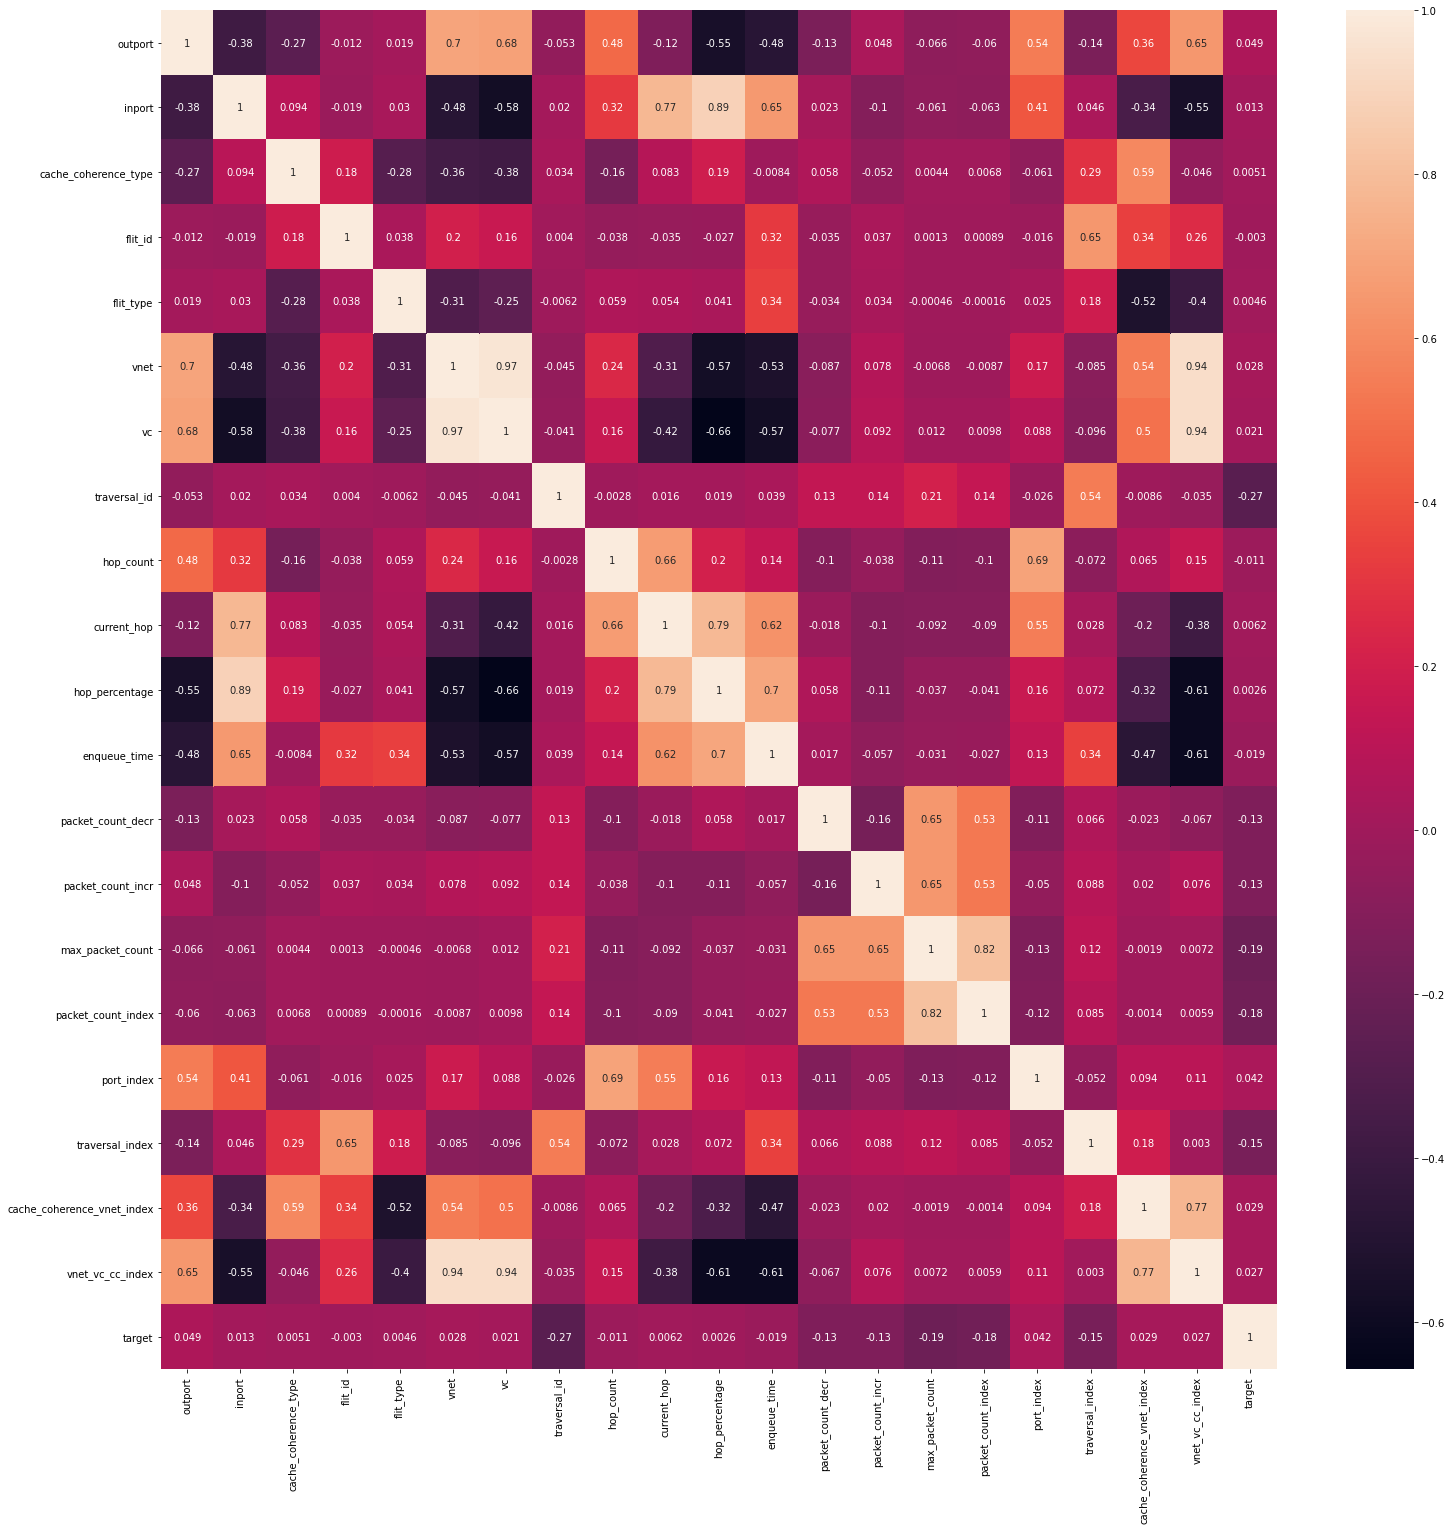

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [0]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
#df = df.drop(columns=[''])

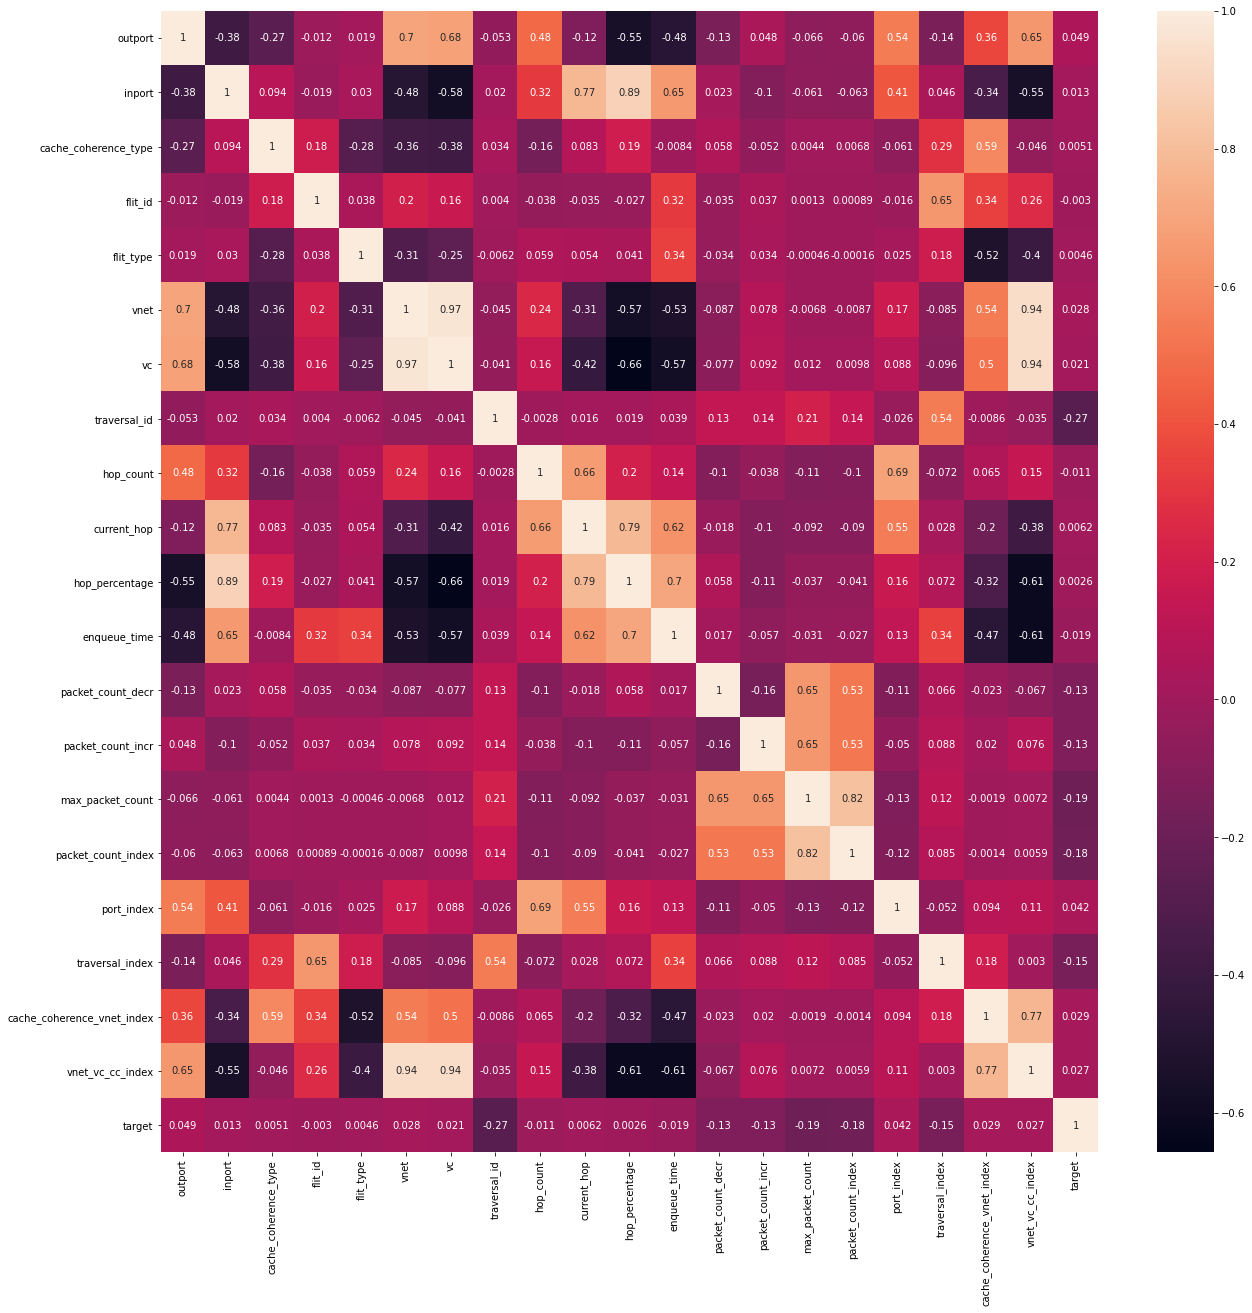

In [0]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(), annot = True)
plt.show()

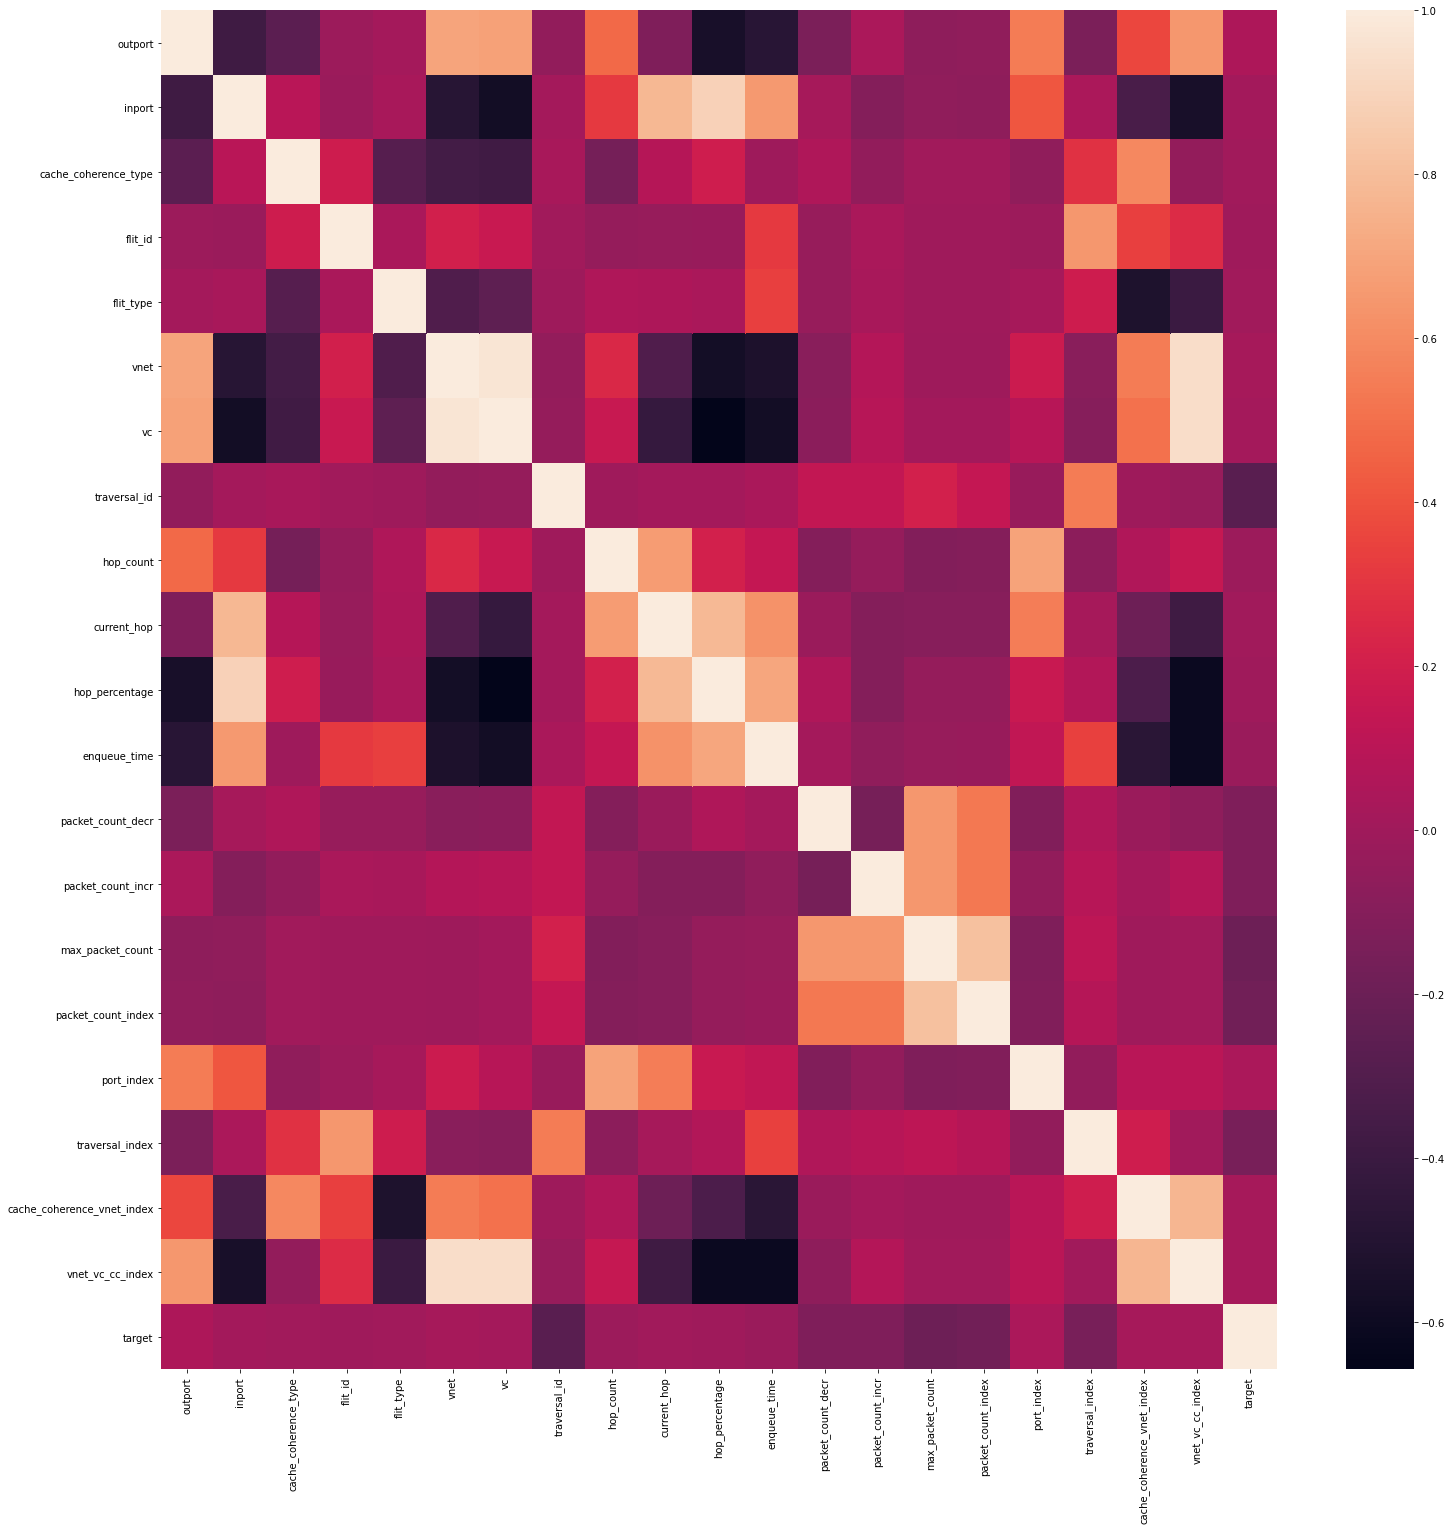

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.000000,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.500000,0.75,1.0,0.176471,0.260116,0.000000,0.260116,0.005879,0.0,0.000001,0.000000,0.000000
1,0.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.500000,0.75,1.0,0.176471,0.219653,0.000000,0.219653,0.004964,0.0,0.000001,0.000000,0.000000
2,0.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.500000,0.75,1.0,0.176471,0.260116,0.000000,0.260116,0.005879,0.0,0.000001,0.000000,0.000000
3,0.000000,0.666667,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.500000,0.75,1.0,0.176471,0.236994,0.000000,0.236994,0.005356,0.0,0.000001,0.000000,0.000000
4,0.000000,1.000000,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.500000,0.75,1.0,0.191176,0.254335,0.000000,0.254335,0.005748,0.0,0.000001,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731051,0.666667,0.000000,0.500000,0.00,0.000000,1.0,1.000000,1.000000,0.666667,0.00,0.0,0.000000,0.023121,0.034682,0.057803,0.004442,0.0,0.044442,0.944444,1.000000
731052,0.666667,0.000000,0.500000,0.25,0.333333,1.0,1.000000,1.000000,0.666667,0.00,0.0,0.014706,0.017341,0.040462,0.057803,0.004050,0.0,0.177780,0.944444,1.000000
731053,0.666667,0.000000,0.500000,0.50,0.333333,1.0,1.000000,1.000000,0.666667,0.00,0.0,0.029412,0.011561,0.046243,0.057803,0.003396,0.0,0.266672,0.944444,1.000000
731054,0.666667,0.000000,0.500000,0.75,0.333333,1.0,1.000000,1.000000,0.666667,0.00,0.0,0.044118,0.005780,0.052023,0.057803,0.002482,0.0,0.355565,0.944444,1.000000


In [0]:
train_X[train_X.duplicated()].shape

(4621, 20)

In [0]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 20)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.000000,0.333333,0.0,0.00,1.000000,0.0,0.000000,0.000067,0.666667,0.8,1.0,0.246154,0.351759,0.000000,0.351759,0.006931,0.0,0.000003,0.000000,0.000000
1,0.333333,1.000000,0.5,0.00,0.000000,1.0,0.727273,0.000000,0.833333,0.8,0.8,0.246154,0.346734,0.005025,0.351759,0.013764,0.5,0.000000,0.944444,0.839142
2,0.333333,1.000000,0.5,0.25,0.333333,1.0,0.727273,0.000000,0.833333,0.8,0.8,0.261538,0.341709,0.010050,0.351759,0.020398,0.5,0.000009,0.944444,0.839142
3,0.333333,1.000000,0.5,0.50,0.333333,1.0,0.727273,0.000000,0.833333,0.8,0.8,0.276923,0.336683,0.015075,0.351759,0.026834,0.5,0.000015,0.944444,0.839142
4,0.333333,1.000000,0.5,0.75,0.333333,1.0,0.727273,0.000000,0.833333,0.8,0.8,0.292308,0.331658,0.020101,0.351759,0.033073,0.5,0.000021,0.944444,0.839142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89915,0.666667,0.000000,0.5,0.00,0.000000,1.0,0.909091,1.000000,0.666667,0.0,0.0,0.015385,0.020101,0.100503,0.120603,0.010298,0.0,0.044443,0.944444,0.946381
89916,0.666667,0.000000,0.5,0.25,0.333333,1.0,0.909091,1.000000,0.666667,0.0,0.0,0.030769,0.015075,0.105528,0.120603,0.008615,0.0,0.177781,0.944444,0.946381
89917,0.666667,0.000000,0.5,0.50,0.333333,1.0,0.909091,1.000000,0.666667,0.0,0.0,0.046154,0.010050,0.110553,0.120603,0.006733,0.0,0.266673,0.944444,0.946381
89918,0.666667,0.000000,0.5,0.75,0.333333,1.0,0.909091,1.000000,0.666667,0.0,0.0,0.061538,0.005025,0.115578,0.120603,0.004654,0.0,0.355565,0.944444,0.946381


In [0]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 20)


In [0]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 20)


In [0]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 20)


In [0]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 20)


In [0]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 20)


In [0]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 20)


In [0]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 20)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    540386
1    190670
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  7272.017594
17             traversal_index  2468.646315
14            max_packet_count  2326.143145
15          packet_count_index  2279.889410
13           packet_count_incr  1170.869971
12           packet_count_decr  1155.294531
16                  port_index   666.131548
0                      outport   522.450376
5                         vnet   249.947200
6                           vc   103.250540
19            vnet_vc_cc_index    68.246570
18  cache_coherence_vnet_index    37.079524
11                enqueue_time    33.803522
1                       inport    28.083814
8                    hop_count    10.192124
9                  current_hop     6.185318
3                      flit_id     4.767758


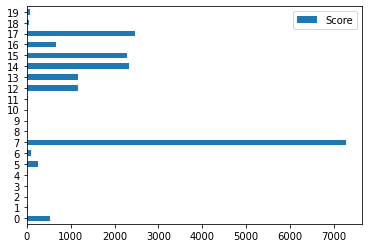

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=20,max_features=20,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r8.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.90198411884194
Test Prediction Score 95.21585095614587


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 86.8116103202847
Test Prediction Score 88.61475922451532
Test Prediction Score 88.26565726083965
Test Prediction Score 87.76830718695136
Test Prediction Score 87.60298558486696
Test Prediction Score 87.32770903036804
Test Prediction Score 88.39961861759839
Test Prediction Score 87.12592098480944


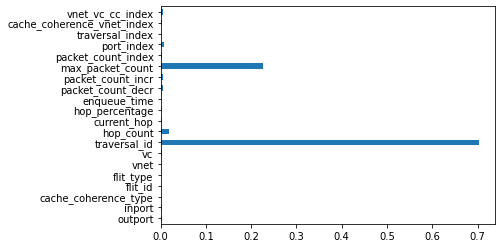

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

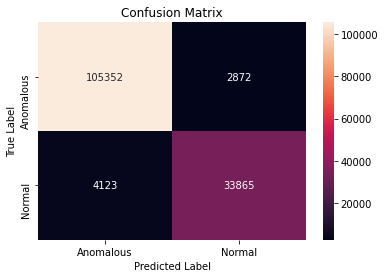

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    108224
           1       0.92      0.89      0.91     37988

    accuracy                           0.95    146212
   macro avg       0.94      0.93      0.94    146212
weighted avg       0.95      0.95      0.95    146212



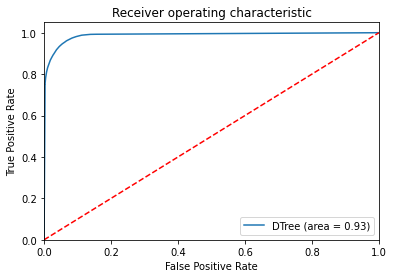

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r8.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [67]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.97691692143546
Test Prediction Score 99.67786501791919


In [68]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 89.1459074733096
Test Prediction Score 89.15415884928079
Test Prediction Score 89.23022377943232
Test Prediction Score 88.74808857676842
Test Prediction Score 88.76303344538773
Test Prediction Score 89.14146669441465
Test Prediction Score 89.16676712659046
Test Prediction Score 88.37967314514418


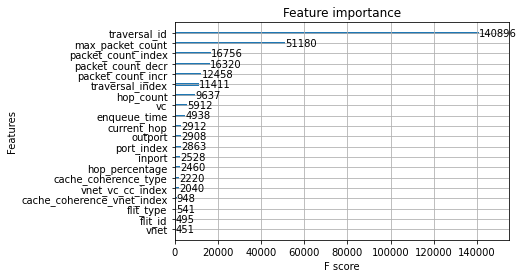

In [69]:
plot_importance(xgbc)
plt.show()

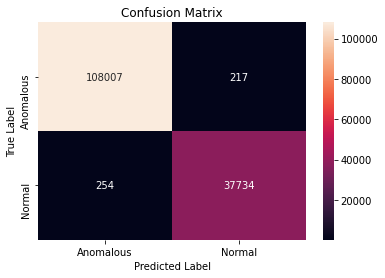

In [70]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [71]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108224
           1       0.99      0.99      0.99     37988

    accuracy                           1.00    146212
   macro avg       1.00      1.00      1.00    146212
weighted avg       1.00      1.00      1.00    146212



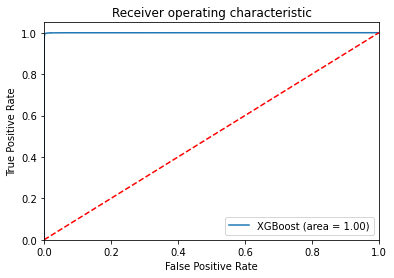

In [72]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()